<a href="https://colab.research.google.com/github/lalitha-sahitya/movie-review-classification/blob/main/movie_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


100%|██████████| 25.7M/25.7M [00:00<00:00, 190MB/s]

In [5]:
os.listdir('imdb-dataset-of-50k-movie-reviews')

['IMDB Dataset.csv']

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
data.shape

(50000, 2)

In [10]:
data.isnull().sum()

,0
review,0
sentiment,0


<Axes: xlabel='sentiment', ylabel='count'>

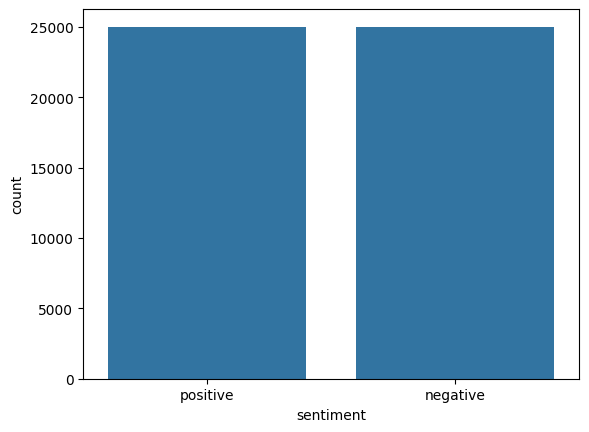

In [11]:
import seaborn as sns
sns.countplot(data=data,x='sentiment')

In [12]:
data.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [13]:
import re

In [14]:
def remove_tags(text):
  tag=re.compile(r'<[^>]+>')
  return tag.sub('',text)

In [15]:
sample_text = "<p>This is <b>bold</b> and <i>italic</i> text.</p>"
clean_text = remove_tags(sample_text)
print(clean_text)

This is bold and italic text.


In [16]:
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords

In [19]:
def preprocess(sen):
  sentence=sen.lower()
  sentence=remove_tags(sentence)
  sentence=re.sub(r'[^\w\s]',' ',sentence)
  sentence=re.sub(r'\b\w\b','',sentence)
  sentence=re.sub(r'\s+',' ',sentence)
  words=re.findall(r'\b\w+\b',sentence)
  stop_words=set(stopwords.words('english'))
  w=[i for i in words if i not in stop_words]
  return " ".join(w)

In [20]:
x=[]
s=list(data['review'])
for i in s:
  x.append(preprocess(i))

In [21]:
x[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

In [22]:
labels=[]
for i in data['sentiment']:
  if i=='positive':
    labels.append(1)
  else:
    labels.append(0)

In [23]:
labels[:10]

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1]

In [24]:
import numpy as np

In [25]:
y=np.array(labels)

In [26]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
import tensorflow as tf

In [30]:
import keras
from keras import preprocessing

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [32]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(x_train)
x_train=word_tokenizer.texts_to_sequences(x_train)
x_test=word_tokenizer.texts_to_sequences(x_test)

In [33]:
vocab_len=len(word_tokenizer.word_index)+1
vocab_len

94265

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
maxlen=10
x_train=pad_sequences(x_train,padding='post',maxlen=maxlen)
x_test=pad_sequences(x_test,padding='post',maxlen=maxlen)

In [36]:
x_train

array([[  176,   863,   770, ...,  7839,   232,   532],
       [    2,    59,   606, ...,    13,   532,  1260],
       [21876,  2412,    97, ...,     1,  2693,    65],
       ...,
       [ 1571,  3322,   153, ...,   216,    16,   510],
       [ 2671,   454,     7, ...,    99,  2380,  1260],
       [  476,  2416,  2393, ...,   148,   698,   154]], dtype=int32)

In [37]:
x_test

array([[  166,  6391,    25, ...,  6636,  1232,   166],
       [  890,  9809,  1358, ...,   980,   250,   229],
       [  226, 31056,  2258, ...,   936,   472,     7],
       ...,
       [   41,    25,   964, ...,   183,   569,   306],
       [  344,    25,   689, ...,   149,    25, 21430],
       [  949,     2,  3953, ...,  1126,   189,  1194]], dtype=int32)

In [38]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [39]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [41]:
model=Sequential()
model.add(Embedding(vocab_len,10,input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_split=0.2)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9938 - loss: 0.0236 - val_accuracy: 0.6867 - val_loss: 2.0571
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9946 - loss: 0.0218 - val_accuracy: 0.6905 - val_loss: 2.2196
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9955 - loss: 0.0187 - val_accuracy: 0.6860 - val_loss: 2.2634
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9956 - loss: 0.0166 - val_accuracy: 0.6891 - val_loss: 2.3157
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9961 - loss: 0.0164 - val_accuracy: 0.6851 - val_loss: 2.3439
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9970 - loss: 0.0129 - val_accuracy: 0.6816 - val_loss: 2.4714
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9970 - loss: 0.0127 - val_accuracy: 0.6829 - val_loss: 2.5035
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.6869 - v

In [55]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

In [56]:
import matplotlib.pyplot as plt

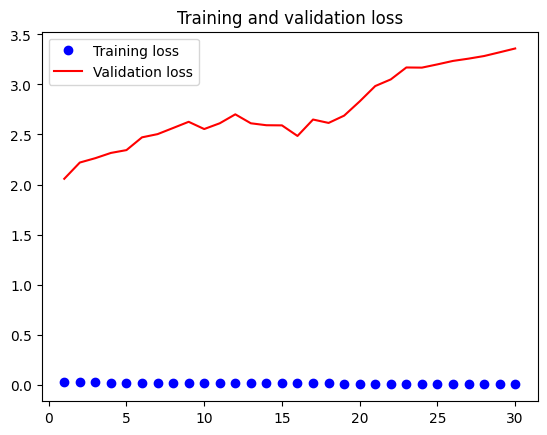

In [57]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()